# Project Inscriptions -- Exploratory Data Analysis

**[Krzysztof Gogol](https://www.linkedin.com/in/krzysztofgogol), February 2025**


### What are the top deployed inscriptions on zkSync?


In [1]:
import os
import polars as pl
import plotly.graph_objects as go

import requests
import pandas as pd

In [2]:
import sys
code_dir = os.path.realpath(os.path.join(os.getcwd(), "..", "src"))
sys.path.append(code_dir)

In [3]:
from plot_utils import get_plotly_layout
from plot_utils import colors
width, height = 800, 450

In [4]:
# Existing dataset dir
data_dir = os.path.realpath(os.path.join(os.getcwd(), "..", "data"))
plots_dir = os.path.realpath(os.path.join(os.getcwd(), "..", "plots"))

# Existing plots dir
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

In [5]:
plot_settings = {
    'arbitrum': {'color': colors['blue'],   'label': 'Arbitrum', 'style': 'solid', 'width': 4, 'marker_symbol': 'circle'},
    'base': {'color': colors['red'],        'label': 'Base', 'style': 'dash', 'width': 3.5, 'marker_symbol': 'diamond'},
    'ethereum': {'color': colors['green'],  'label': 'Ethereum', 'style': 'dot', 'width': 3, 'marker_symbol': 'square'},
    'optimism': {'color': colors['grey'],   'label': 'Optimism', 'style': 'dashdot', 'width': 2.5, 'marker_symbol': 'triangle-up'},
    'zksync_era': {'color': colors['pink'],     'label': 'zkSync', 'style': 'solid', 'width': 2, 'marker_symbol': 'cross'},
    'fantom': {'color': colors['brown'],    'label': 'Fantom', 'style': 'dash', 'width': 1.5, 'marker_symbol': 'star'},
}

In [6]:
chains = [
    'arbitrum',
    'base',
    'ethereum',
    'optimism',
    'zksync_era'
]

In [7]:
url = 'https://api.growthepie.xyz/v1/fundamentals_full.json'
response = requests.get(url)
grow_the_pie_df = pd.DataFrame(response.json())
grow_the_pie_df.head()

,metric_key,origin_key,date,value
0,aa_last7d,ethereum,2025-02-24,2220252.0
1,aa_last7d,ethereum,2025-02-04,1996737.0
2,aa_last7d,arbitrum,2025-02-12,1416474.0
3,aa_last7d,arbitrum,2025-02-13,1424279.0
4,aa_last7d,starknet,2023-07-05,368442.0


In [8]:
tx_count_data = {}  # Dictionary to store tx count data for each chain

for chain in chains:
    # Filter data based on conditions
    filtered_data = grow_the_pie_df[(grow_the_pie_df['metric_key'] == 'txcount') &
                                    (grow_the_pie_df['origin_key'] == chain) &
                                    (grow_the_pie_df['date'] >= '2023-11-01') &
                                    (grow_the_pie_df['date'] <= '2024-03-24')].sort_values('date')

    # Store filtered data in the dictionary
    tx_count_data[chain] = filtered_data

# Access the tx count data for a specific chain, for example, 'arbitrum'
print(tx_count_data['arbitrum'])

       metric_key origin_key        date      value
383357    txcount   arbitrum  2023-11-01   741205.0
383123    txcount   arbitrum  2023-11-02   698354.0
382949    txcount   arbitrum  2023-11-03   720278.0
383706    txcount   arbitrum  2023-11-04   722799.0
383422    txcount   arbitrum  2023-11-05   641402.0
...           ...        ...         ...        ...
383502    txcount   arbitrum  2024-03-20  1862635.0
384200    txcount   arbitrum  2024-03-21  1499596.0
383416    txcount   arbitrum  2024-03-22  1534588.0
384201    txcount   arbitrum  2024-03-23  1314561.0
383263    txcount   arbitrum  2024-03-24  1311866.0

[145 rows x 4 columns]


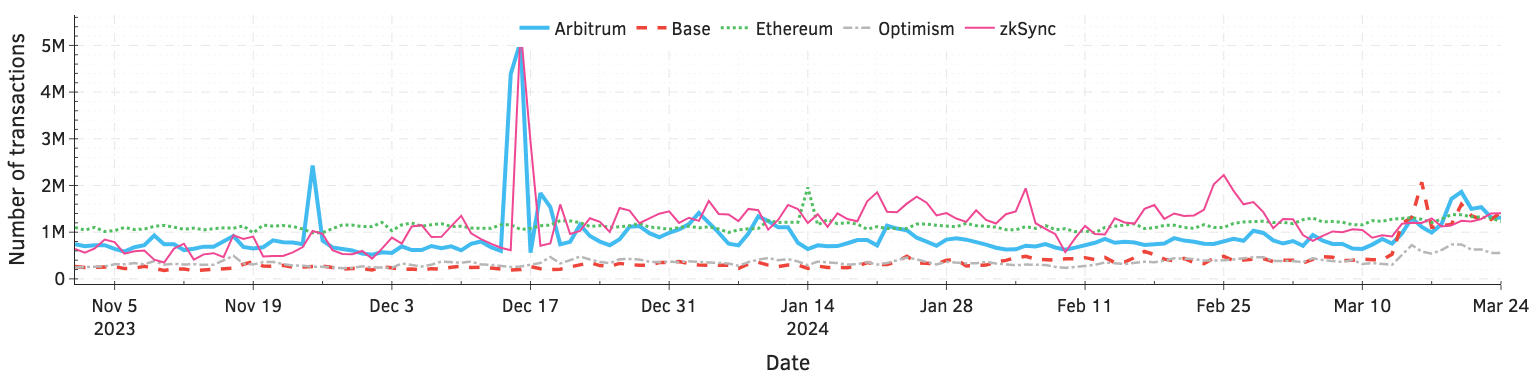

In [9]:
fig = go.Figure(layout=get_plotly_layout(width=1540, height=380))

for protocol, df in tx_count_data.items():
    fig.add_trace(go.Scatter(
        x=df['date'], y=df['value'],
        line=dict(color=plot_settings[protocol]['color'], width=plot_settings[protocol]
                  ['width'], dash=plot_settings[protocol]['style']),
        name=plot_settings[protocol]['label'],
        marker=dict(size=8, symbol=plot_settings[protocol]['marker_symbol'])
    ))

fig.update_layout(yaxis_title="Number of transactions",
                  xaxis_title="Date",
                  # yaxis=dict(type="log", range=[0, 10]),
                  legend=dict(xanchor='center', x=0.5, y=1.02, orientation='h'))

file_dir = os.path.realpath(os.path.join(plots_dir, "all-transactions.pdf"))
fig.show('png')

In [10]:
tx_cost_data = {}  # Dictionary to store tx count data for each chain

for chain in chains:
    # Filter data based on conditions
    filtered_data = grow_the_pie_df[(grow_the_pie_df['metric_key'] == 'txcosts_median_eth') &
                                    (grow_the_pie_df['origin_key'] == chain) &
                                    (grow_the_pie_df['date'] >= '2023-11-01') &
                                    (grow_the_pie_df['date'] <= '2024-02-01')].sort_values('date')

    # Store filtered data in the dictionary
    tx_cost_data[chain] = filtered_data

# Access the tx count data for a specific chain, for example, 'arbitrum'
print(tx_cost_data['arbitrum'])

                metric_key origin_key        date     value
352219  txcosts_median_eth   arbitrum  2023-11-01  0.000084
351203  txcosts_median_eth   arbitrum  2023-11-02  0.000084
350972  txcosts_median_eth   arbitrum  2023-11-03  0.000073
352568  txcosts_median_eth   arbitrum  2023-11-04  0.000062
352289  txcosts_median_eth   arbitrum  2023-11-05  0.000067
...                    ...        ...         ...       ...
351143  txcosts_median_eth   arbitrum  2024-01-28  0.000045
351189  txcosts_median_eth   arbitrum  2024-01-29  0.000051
351206  txcosts_median_eth   arbitrum  2024-01-30  0.000077
351056  txcosts_median_eth   arbitrum  2024-01-31  0.000078
352338  txcosts_median_eth   arbitrum  2024-02-01  0.000080

[93 rows x 4 columns]


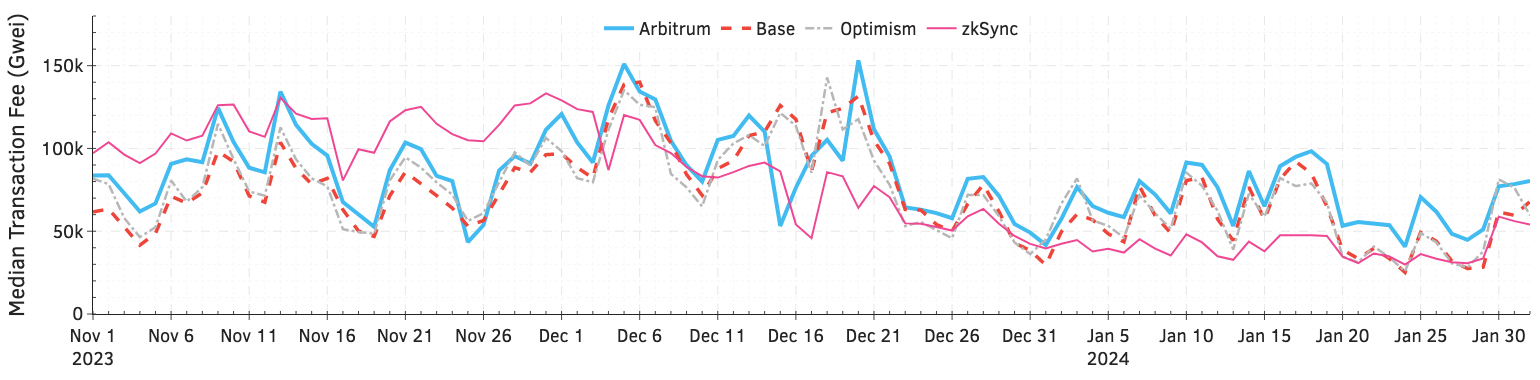

In [11]:
COST_GWEI = 1e9

fig = go.Figure(layout=get_plotly_layout(width=1540, height=380))

for protocol, df in tx_cost_data.items():
    if (protocol != 'ethereum'):
        fig.add_trace(go.Scatter(
            x=df['date'], y=df['value']*COST_GWEI,
            line=dict(color=plot_settings[protocol]['color'], width=plot_settings[protocol]
                      ['width'], dash=plot_settings[protocol]['style']),
            name=plot_settings[protocol]['label'],
            marker=dict(
                size=8, symbol=plot_settings[protocol]['marker_symbol'])
        ))

fig.update_layout(yaxis_title="Median Transaction Fee (Gwei)",
                  # xaxis_title="Date",
                  # yaxis=dict(type="log", range=[4, 6]),
                  xaxis=dict(
                      # tickformat="%Y-%m-%d",  # Customize the format as needed
                      dtick=432000000,  # Set the interval between ticks to one week
                  ),
                  legend=dict(xanchor='center', x=0.5, y=1.02, orientation='h'))
fig.update_yaxes(range=[0, 180_000])

file_dir = os.path.realpath(os.path.join(plots_dir, "all-median_cost.pdf"))
fig.write_image(file_dir)
fig.show('png')

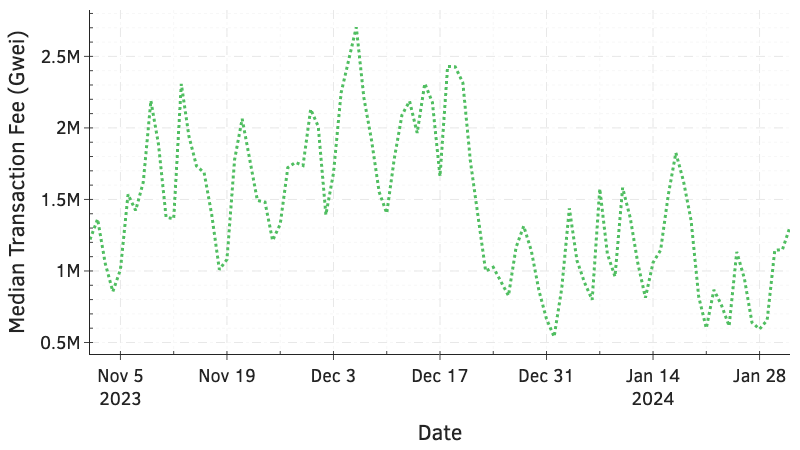

In [12]:
COST_GWEI = 1e9
fig = go.Figure(layout=get_plotly_layout(width=width, height=height))

for protocol, df in tx_cost_data.items():
    if (protocol == 'ethereum'):
        fig.add_trace(go.Scatter(
            x=df['date'], y=df['value']*COST_GWEI,
            line=dict(color=plot_settings[protocol]['color'], width=plot_settings[protocol]
                      ['width'], dash=plot_settings[protocol]['style']),
            name=plot_settings[protocol]['label'],
            marker=dict(
                size=8, symbol=plot_settings[protocol]['marker_symbol'])
        ))

fig.update_layout(yaxis_title="Median Transaction Fee (Gwei)",
                  xaxis_title="Date",
                  # yaxis=dict(type="log", range=[0, 1]),
                  legend=dict(xanchor='center', x=0.5, y=1.02, orientation='h'))

file_dir = os.path.realpath(os.path.join(plots_dir, "eth-median_cost.pdf"))
fig.write_image(file_dir)
fig.show('png')

In [13]:
merged_dfs = {}
for chain in chains:
    merged_df = tx_cost_data[chain].merge(tx_count_data[chain], on='date')
    merged_dfs[chain] = merged_df

arbitrum
base
ethereum
optimism
zksync_era


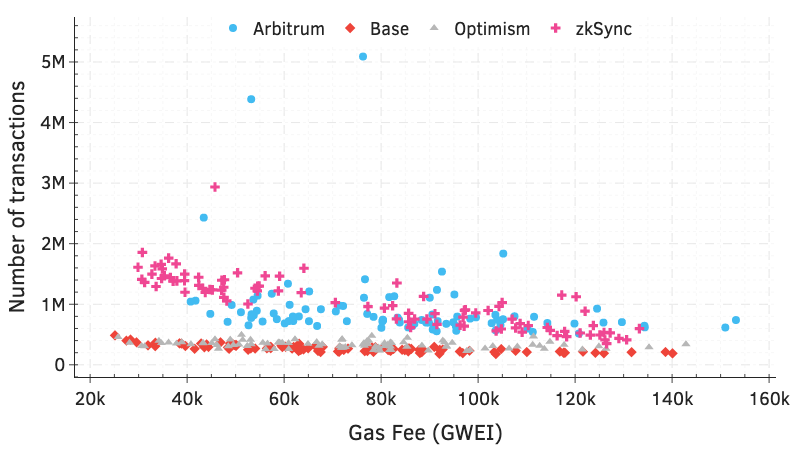

In [14]:
fig = go.Figure(layout=get_plotly_layout(width=width, height=height))

for protocol, df in merged_dfs.items():
    print(protocol)
    if (protocol != 'ethereum'):
        fig.add_trace(go.Scatter(
            x=df['value_x']*COST_GWEI, y=df['value_y'],
            line=dict(color=plot_settings[protocol]['color'], width=plot_settings[protocol]
                      ['width'], dash=plot_settings[protocol]['style']),
            name=plot_settings[protocol]['label'],
            mode='markers',
            marker=dict(
                size=8, symbol=plot_settings[protocol]['marker_symbol'])
        ))

fig.update_layout(yaxis_title="Number of transactions",
                  xaxis_title="Gas Fee (GWEI)",
                  # yaxis=dict(type="log", range=[0, 10]),
                  legend=dict(xanchor='center', x=0.5, y=1.02, orientation='h'))

file_dir = os.path.realpath(os.path.join(plots_dir, "rollup-regression.pdf"))
fig.write_image(file_dir)
fig.show('png')

arbitrum
base
ethereum
optimism
zksync_era


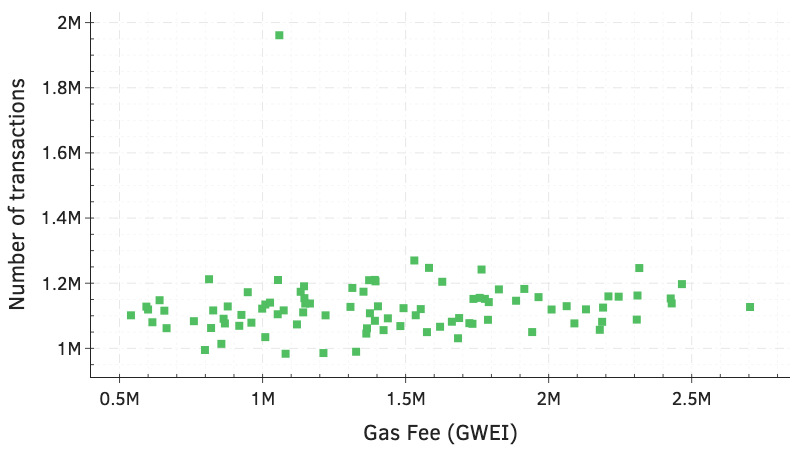

In [15]:
fig = go.Figure(layout=get_plotly_layout(width=width, height=height))

for protocol, df in merged_dfs.items():
    print(protocol)
    if (protocol == 'ethereum'):
        fig.add_trace(go.Scatter(
            x=df['value_x']*COST_GWEI, y=df['value_y'],
            line=dict(color=plot_settings[protocol]['color'], width=plot_settings[protocol]
                      ['width'], dash=plot_settings[protocol]['style']),
            name=plot_settings[protocol]['label'],
            mode='markers',
            marker=dict(
                size=8, symbol=plot_settings[protocol]['marker_symbol'])
        ))

fig.update_layout(yaxis_title="Number of transactions",
                  xaxis_title="Gas Fee (GWEI)",
                  # yaxis=dict(type="log", range=[0, 10]),
                  legend=dict(xanchor='center', x=0.5, y=1.02, orientation='h'))

file_dir = os.path.realpath(os.path.join(plots_dir, "ethereum-regression.pdf"))
fig.write_image(file_dir)
fig.show('png')